## Titanic Data Exploration ##

***

Over the past several weeks, you've learned the code about how to explore and manipulate a dataset. Now it's time to practice what you've learned on a real-world dataset. 

***

### Titanic Dataset

The titanic dataset holds information about the passengers on the titanic. This includes passenger name, characteristics, and if they survived the accident. The dataset has the following columns:

    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment 
    * body = recovered body number
    * home dest = anticipated home destination 
    
If you need some additional motivation before starting, please visit: https://www.youtube.com/watch?v=3gK_2XdjOdY

### How to work through the dataset:

Follow the prompts below to explore, manipulate, and visualize aspects of the dataset. Working with data takes time, so take your time as you start with a messy dataset and turn it into something that shows meaningful visualizations. 

***


### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the titanic.xlsx dataset

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_excel("titanic.xlsx")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [4]:
# 14 columns, 1309 rows
# some quantitative, some categorical data
# "survived" could be considered dependent

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

In [5]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### Handling the Missing Data in the Dataset

   * Remove the columns with excessive missing data (any column missing greater than 500 rows)
   * Remove the rows in the dataset that has missing "age" data. 
   * Recheck is there is any data missing in the dataset. 

In [6]:
df.drop(columns = "cabin", inplace = True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.drop(columns = "boat", inplace = True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
df.drop(columns = "body", inplace = True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [9]:
df.drop(columns = "home.dest", inplace = True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [10]:
df.dropna(inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1043 non-null   int64  
 1   survived  1043 non-null   int64  
 2   name      1043 non-null   object 
 3   sex       1043 non-null   object 
 4   age       1043 non-null   float64
 5   sibsp     1043 non-null   int64  
 6   parch     1043 non-null   int64  
 7   ticket    1043 non-null   object 
 8   fare      1043 non-null   float64
 9   embarked  1043 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 89.6+ KB


In [12]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

### Creating Columns and Replacing Labels

   * Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)
   * Create a new column called "Titanic Passenger" and make all values 1
   * Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
   * Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 
   * Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
   * Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 
   * Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
   
After create new columns, replace the basic coding "0/1" with meaningful labels. 

In [13]:
def passClass(num):
    if num == 1:
        return "First Class"
    if num == 2:
        return "Second Class"
    if num == 3:
        return "Third Class"
    else:
        return "Unknown"

df["PassengerClass"] = df["pclass"].apply(passClass)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,PassengerClass
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,First Class
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,First Class
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,First Class
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,First Class
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,First Class
...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,C,Third Class
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,Third Class
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,Third Class
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,Third Class


In [14]:
def survive(num):
    if num == 0:
        return "No"
    if num == 1:
        return "Yes"
    else:
        return "Unknown"

df["Survived"] = df["survived"].apply(survive)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,PassengerClass,Survived
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,First Class,Yes
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,First Class,Yes
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,First Class,No
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,First Class,No
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,First Class,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,C,Third Class,No
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,Third Class,No
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,Third Class,No
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,Third Class,No


In [15]:
def embark(letter):
    if letter == "S":
        return "Southampton"
    if letter == "C":
        return "Cherbourg"
    if letter == "Q":
        return "Queenstown"
    else:
        return "Unknown"

df["Port of Embarcation"] = df["embarked"].apply(embark)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,PassengerClass,Survived,Port of Embarcation
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,First Class,Yes,Southampton
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,First Class,Yes,Southampton
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,First Class,No,Southampton
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,First Class,No,Southampton
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,First Class,No,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,C,Third Class,No,Cherbourg
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,Third Class,No,Cherbourg
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,Third Class,No,Cherbourg
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,Third Class,No,Cherbourg


In [16]:
df["Titanic Passenger"] = 1
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,PassengerClass,Survived,Port of Embarcation,Titanic Passenger
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,First Class,Yes,Southampton,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,First Class,Yes,Southampton,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,First Class,No,Southampton,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,First Class,No,Southampton,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,First Class,No,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,C,Third Class,No,Cherbourg,1
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,Third Class,No,Cherbourg,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,Third Class,No,Cherbourg,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,Third Class,No,Cherbourg,1


In [17]:
df.drop(columns = ["pclass", "survived", "embarked"], inplace = True)
df

,name,sex,age,sibsp,parch,ticket,fare,PassengerClass,Survived,Port of Embarcation,Titanic Passenger
0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,First Class,Yes,Southampton,1
1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,First Class,Yes,Southampton,1
2,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,First Class,No,Southampton,1
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,First Class,No,Southampton,1
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,First Class,No,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...
1301,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,Third Class,No,Cherbourg,1
1304,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Third Class,No,Cherbourg,1
1306,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Third Class,No,Cherbourg,1
1307,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Third Class,No,Cherbourg,1


In [18]:
df["Family Size"] = df["sibsp"] + df["parch"]

In [19]:
df

,name,sex,age,sibsp,parch,ticket,fare,PassengerClass,Survived,Port of Embarcation,Titanic Passenger,Family Size
0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,First Class,Yes,Southampton,1,0
1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,First Class,Yes,Southampton,1,3
2,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,Third Class,No,Cherbourg,1,0
1304,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Third Class,No,Cherbourg,1,1
1306,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Third Class,No,Cherbourg,1,0
1307,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Third Class,No,Cherbourg,1,0


In [20]:
# Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family.

df ["Travel Alone"] = np.where(df['Family Size']>0, 0, 1)
df

,name,sex,age,sibsp,parch,ticket,fare,PassengerClass,Survived,Port of Embarcation,Titanic Passenger,Family Size,Travel Alone
0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,First Class,Yes,Southampton,1,0,1
1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,First Class,Yes,Southampton,1,3,0
2,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,0
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,0
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,Third Class,No,Cherbourg,1,0,1
1304,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Third Class,No,Cherbourg,1,1,0
1306,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Third Class,No,Cherbourg,1,0,1
1307,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Third Class,No,Cherbourg,1,0,1


In [21]:
df ["Travel Alone"] = np. where(df["Family Size"] == 0, "Yes", "No")

In [22]:
df

,name,sex,age,sibsp,parch,ticket,fare,PassengerClass,Survived,Port of Embarcation,Titanic Passenger,Family Size,Travel Alone
0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,First Class,Yes,Southampton,1,0,Yes
1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,First Class,Yes,Southampton,1,3,No
2,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,Third Class,No,Cherbourg,1,0,Yes
1304,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Third Class,No,Cherbourg,1,1,No
1306,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Third Class,No,Cherbourg,1,0,Yes
1307,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Third Class,No,Cherbourg,1,0,Yes


In [23]:
# Create a column called "Has Caregiver" 

df ["Has Caregiver"] = np.where(((df['Family Size']>=1) & (df["age"]<13)), 1, 0)
df

,name,sex,age,sibsp,parch,ticket,fare,PassengerClass,Survived,Port of Embarcation,Titanic Passenger,Family Size,Travel Alone,Has Caregiver
0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,First Class,Yes,Southampton,1,0,Yes,0
1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,First Class,Yes,Southampton,1,3,No,1
2,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,1
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,0
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,Third Class,No,Cherbourg,1,0,Yes,0
1304,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Third Class,No,Cherbourg,1,1,No,0
1306,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Third Class,No,Cherbourg,1,0,Yes,0
1307,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Third Class,No,Cherbourg,1,0,Yes,0


In [24]:
# Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0.

df ["Has Caregiver"] = np.where(df["Has Caregiver"] == 1, "Yes", "No")
df

,name,sex,age,sibsp,parch,ticket,fare,PassengerClass,Survived,Port of Embarcation,Titanic Passenger,Family Size,Travel Alone,Has Caregiver
0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,First Class,Yes,Southampton,1,0,Yes,No
1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,First Class,Yes,Southampton,1,3,No,Yes
2,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,Yes
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,No
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,Third Class,No,Cherbourg,1,0,Yes,No
1304,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Third Class,No,Cherbourg,1,1,No,No
1306,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Third Class,No,Cherbourg,1,0,Yes,No
1307,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Third Class,No,Cherbourg,1,0,Yes,No


In [25]:
# Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise.

df["Crew"] = np.where(df["fare"] == 0, 1, 0)

In [26]:
df

,name,sex,age,sibsp,parch,ticket,fare,PassengerClass,Survived,Port of Embarcation,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew
0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,First Class,Yes,Southampton,1,0,Yes,No,0
1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,First Class,Yes,Southampton,1,3,No,Yes,0
2,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,Yes,0
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,No,0
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,Third Class,No,Cherbourg,1,0,Yes,No,0
1304,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Third Class,No,Cherbourg,1,1,No,No,0
1306,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Third Class,No,Cherbourg,1,0,Yes,No,0
1307,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Third Class,No,Cherbourg,1,0,Yes,No,0


In [27]:
df.loc[df["Crew"] == 1]

,name,sex,age,sibsp,parch,ticket,fare,PassengerClass,Survived,Port of Embarcation,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew
7,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,First Class,No,Southampton,1,0,Yes,No,1
150,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,First Class,No,Southampton,1,0,Yes,No,1
170,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,First Class,Yes,Southampton,1,0,Yes,No,1
234,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,First Class,No,Southampton,1,0,Yes,No,1
896,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,Third Class,No,Southampton,1,0,Yes,No,1
898,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,Third Class,No,Southampton,1,0,Yes,No,1
963,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,Third Class,No,Southampton,1,0,Yes,No,1
1254,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,Third Class,Yes,Southampton,1,0,Yes,No,1


In [28]:
df[df["Crew"] == 1]["Crew"].sum()

8

In [29]:
# Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise.

df["Crew"] = np.where(df["Crew"] == 1, "Yes", "No")
df

,name,sex,age,sibsp,parch,ticket,fare,PassengerClass,Survived,Port of Embarcation,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew
0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,First Class,Yes,Southampton,1,0,Yes,No,No
1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,First Class,Yes,Southampton,1,3,No,Yes,No
2,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,Yes,No
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,No,No
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,Third Class,No,Cherbourg,1,0,Yes,No,No
1304,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Third Class,No,Cherbourg,1,1,No,No,No
1306,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Third Class,No,Cherbourg,1,0,Yes,No,No
1307,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Third Class,No,Cherbourg,1,0,Yes,No,No


In [30]:
# Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create.

ages = [0, 3, 13, 20, 65, 200]
ageLabels = ["Infant", "Child", "Teen", "Adult", "Senior"]

df["Age Group"] = pd.cut(df["age"], ages, labels = ageLabels)

df

,name,sex,age,sibsp,parch,ticket,fare,PassengerClass,Survived,Port of Embarcation,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,First Class,Yes,Southampton,1,0,Yes,No,No,Adult
1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,First Class,Yes,Southampton,1,3,No,Yes,No,Infant
2,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,Yes,No,Infant
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,No,No,Adult
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,First Class,No,Southampton,1,3,No,No,No,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,Third Class,No,Cherbourg,1,0,Yes,No,No,Adult
1304,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Third Class,No,Cherbourg,1,1,No,No,No,Teen
1306,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Third Class,No,Cherbourg,1,0,Yes,No,No,Adult
1307,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Third Class,No,Cherbourg,1,0,Yes,No,No,Adult


In [31]:
df["Titanic Passenger"] = np.where(df["Titanic Passenger"] == 1, "Yes", "No")
df

,name,sex,age,sibsp,parch,ticket,fare,PassengerClass,Survived,Port of Embarcation,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,First Class,Yes,Southampton,Yes,0,Yes,No,No,Adult
1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,First Class,Yes,Southampton,Yes,3,No,Yes,No,Infant
2,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,First Class,No,Southampton,Yes,3,No,Yes,No,Infant
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,First Class,No,Southampton,Yes,3,No,No,No,Adult
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,First Class,No,Southampton,Yes,3,No,No,No,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,Third Class,No,Cherbourg,Yes,0,Yes,No,No,Adult
1304,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Third Class,No,Cherbourg,Yes,1,No,No,No,Teen
1306,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Third Class,No,Cherbourg,Yes,0,Yes,No,No,Adult
1307,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Third Class,No,Cherbourg,Yes,0,Yes,No,No,Adult


### Determine Frequencies of Groups

* How many passengers fall into each category? Determine how many passengers fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [32]:
df["sex"].value_counts()

male      657
female    386
Name: sex, dtype: int64

In [33]:
df["PassengerClass"].value_counts()

Third Class     500
First Class     282
Second Class    261
Name: PassengerClass, dtype: int64

In [34]:
df["Survived"].value_counts()

No     618
Yes    425
Name: Survived, dtype: int64

In [35]:
df["Port of Embarcation"].value_counts()

Southampton    781
Cherbourg      212
Queenstown      50
Name: Port of Embarcation, dtype: int64

In [36]:
df["Travel Alone"].value_counts()

Yes    587
No     456
Name: Travel Alone, dtype: int64

In [37]:
df["Has Caregiver"].value_counts()

No     952
Yes     91
Name: Has Caregiver, dtype: int64

In [38]:
df["Crew"].value_counts()

No     1035
Yes       8
Name: Crew, dtype: int64

In [39]:
df["Age Group"].value_counts()

Adult     785
Teen      149
Child      58
Infant     41
Senior     10
Name: Age Group, dtype: int64

### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [40]:
df.describe()

,age,sibsp,parch,fare,Family Size
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,29.813199,0.504314,0.421860,36.603024,0.926174
std,14.366261,0.913080,0.840655,55.753648,1.454134
min,0.166700,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,8.050000,0.000000
50%,28.000000,0.000000,0.000000,15.750000,0.000000
75%,39.000000,1.000000,1.000000,35.077100,1.000000
max,80.000000,8.000000,6.000000,512.329200,10.000000


### Relationships between Variables

* Determine the relationship between each variable and the variable "survived". This is our primary variable of interest -- did this passenger survive the accident? Did the characteristics of the passenger have any relationship with their survival?
    * <b>pclass</b>: how many survivors are in each passenger class? does a pattern emerge? which class has the most survivors? which has the least?
    * <b>sex</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>age</b>: how does the average age of the passenger differ based on survival group? 
    * <b>age group</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>family size</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>travel alone</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>crew</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>has caregiver</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>fare</b>: how does the average fare the passenger paid differ based on survival group? 
    * <b>embarked</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    
Based on what you learn working through this section, make (2) statements about what characteristics of passenger most influenced their survival.

In [41]:
pd.crosstab(df["PassengerClass"], df["Survived"], margins = True, normalize = False)

Survived,No,Yes,All
PassengerClass,,,
First Class,103,179,282
Second Class,146,115,261
Third Class,369,131,500
All,618,425,1043


In [42]:
pd.crosstab(df["sex"], df["Survived"], margins = True, normalize = False)

Survived,No,Yes,All
sex,,,
female,96,290,386
male,522,135,657
All,618,425,1043


In [43]:
df["age"].groupby(df["Survived"]).mean()

Survived
No     30.496899
Yes    28.819020
Name: age, dtype: float64

In [44]:
pd.crosstab(df["Age Group"], df["Survived"], margins = True, normalize = False)

Survived,No,Yes,All
Age Group,,,
Infant,15,26,41
Child,27,31,58
Teen,92,57,149
Adult,476,309,785
Senior,8,2,10
All,618,425,1043


In [45]:
pd.crosstab(df["Family Size"], df["Survived"], margins = True, normalize = False)

Survived,No,Yes,All
Family Size,,,
0,401,186,587
1,93,113,206
2,63,81,144
3,9,30,39
4,11,6,17
5,20,5,25
6,12,4,16
7,8,0,8
10,1,0,1


In [46]:
pd.crosstab(df["Travel Alone"], df["Survived"], margins = True, normalize = False)

Survived,No,Yes,All
Travel Alone,,,
No,217,239,456
Yes,401,186,587
All,618,425,1043


In [47]:
pd.crosstab(df["Crew"], df["Survived"], margins = True, normalize = False)

Survived,No,Yes,All
Crew,,,
No,612,423,1035
Yes,6,2,8
All,618,425,1043


In [48]:
pd.crosstab(df["Has Caregiver"], df["Survived"], margins = True, normalize = False)

Survived,No,Yes,All
Has Caregiver,,,
No,579,373,952
Yes,39,52,91
All,618,425,1043


In [49]:
df["fare"].groupby(df["Survived"]).mean()

Survived
No     25.148752
Yes    53.258883
Name: fare, dtype: float64

In [50]:
pd.crosstab(df["Port of Embarcation"], df["Survived"], margins = True, normalize = False)

Survived,No,Yes,All
Port of Embarcation,,,
Cherbourg,80,132,212
Queenstown,37,13,50
Southampton,501,280,781
All,618,425,1043


### Visualize your Results

* Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 
* Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?
* Create a violin plot to show the distribution of age across passenger class. 

<AxesSubplot:xlabel='Survived', ylabel='age'>

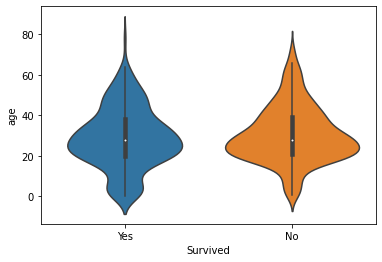

In [60]:
sns.violinplot(x = df["Survived"], y = df["age"])

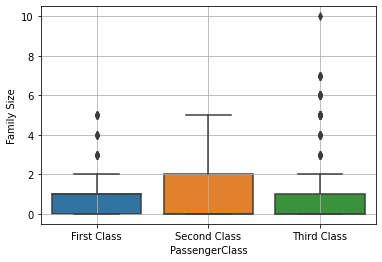

In [54]:
sns.boxplot(x = df["PassengerClass"], y = df["Family Size"])

plt.grid() # add grid lines to plot

Text(0.5, 1.0, 'Age Group vs. Survival')

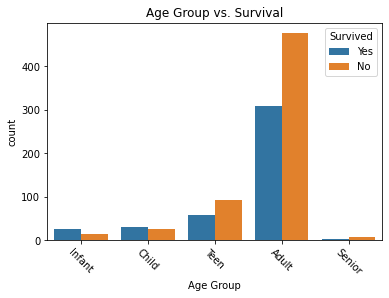

In [59]:
sns.countplot(data = df, x = "Age Group", hue = "Survived")

plt.xticks(rotation = -45)
plt.title('Age Group vs. Survival')

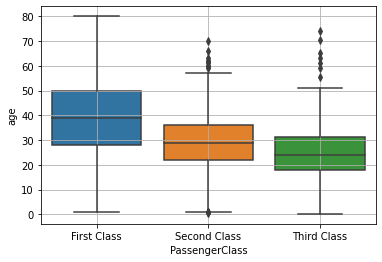

In [61]:
sns.boxplot(x = df["PassengerClass"], y = df["age"])

plt.grid() # add grid lines to plot

<AxesSubplot:xlabel='PassengerClass', ylabel='age'>

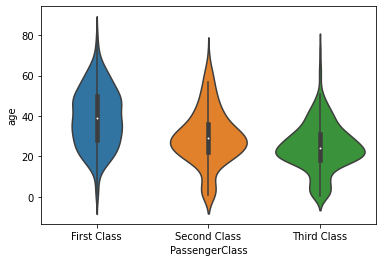

In [62]:
sns.violinplot(x = df["PassengerClass"], y = df["age"])